In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#df_folder = '/Users/ayesh/Downloads/SEQ_test3/complete_data/usable/'
df_folder = '/Users/ayesh/Downloads/right_thresh/4_sq/complete_data/usable/'
#path = '/Users/ayesh/Desktop/Fearmap_data/rotation_project/data/'
 
behav_files = [f for f in listdir(df_folder) if isfile(join(df_folder, f))]

csv_list = []

for a in behav_files:
    if a[-4:] == ".csv":
        csv_list.append(df_folder + a)

In [3]:
#df = print(df.replace(r'^\s*$', np.nan, regex=True))

subid = []
avg_AB1_neu = []
avg_AB2_neu = []
avg_AB3_neu = []
avg_BC_neu = []
avg_XY_neu = []
avg_AC_neu = []


avg_AB1_emo = []
avg_AB2_emo = []
avg_AB3_emo = []
avg_BC_emo = []
avg_XY_emo = []
avg_AC_emo = []


for pt_file in csv_list:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    df.replace(r'\s+',np.nan,regex=True).replace('',np.nan)
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCXYcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BCXY_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys
    
    AB1_trialresp_rt = df.key_resp_rt
    AB2_trialresp_rt = df.key_resp_2_rt
    AB3_trialresp_rt = df.key_resp_3_rt
    BCXY_trialresp_rt = df.key_resp_4_rt
    AC_trialresp_rt = df.key_resp_5_rt
    
    AB1_trialtype = df.test1_face_image
    AB2_trialtype = df.test2_face_image
    AB3_trialtype = df.test3_face_image
    BCXY_trialtype = df.testBC_face_image
    ACobjectcue = df.testAC_objectC_image
    ACobjectAimage = df.testAC_objectA_image
    
    AB3_objecttype = df.test3_objectA_image
    BCXY_objecttype = df.testBC_objectC_image

    
    ACobjectA = df.orig_objectA_image
    ACobjectC = df.objectC_image4
    overlapB_faceimage = df.face_image4
    overlap_list = []
    emo_faced = []
    neu_faced = []
    test = []
    overlap = df.test_overlap

    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_XYtrials = []
    t_ACtrials = []
 
    
    fear_AB1trials = []
    fear_AB2trials = []
    fear_AB3trials = []
    fear_BCtrials = []
    fear_XYtrials = []
    fear_ACtrials = []
 
    
    neut_AB1trials = []
    neut_AB2trials = []
    neut_AB3trials = []
    neut_BCtrials = []
    neut_XYtrials = []
    neut_ACtrials = []
    
    f_AB1corr = []
    f_AB2corr = []
    f_AB3corr = []
    f_BCcorr = []
    f_XYcorr = []
    f_ACcorr = []
    
    n_AB1corr = []
    n_AB2corr = []
    n_AB3corr = []
    n_BCcorr = []
    n_XYcorr = []
    n_ACcorr = []
    
    n_AB3_object = []
    n_BC_object = []
    f_AB3_object = []
    f_BC_object = []
    

            
    for index, row in df.iterrows():
        valence3 = AB3_trialtype[index]
        valenceBC = BCXY_trialtype[index]
        
        if np.isnan(AB3_trialresp[index]) == False:
            if valence3[2:6] == 'fear':
                fear_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    f_AB3_object.append(AB3_objecttype[index])
                    f_AB3corr.append(AB3_trialresp_rt[index])
            elif valence3[2:6] == 'neut':
                neut_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    n_AB3_object.append(AB3_objecttype[index])
                    n_AB3corr.append(AB3_trialresp_rt[index])
        ######################################################################

        if np.isnan(BCXY_trialresp[index]) == False and overlap[index] == 'BC':
            if valenceBC[2:6] == 'fear':
                fear_BCtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    f_BC_object.append(BCXY_objecttype[index])
                    f_BCcorr.append(BCXY_trialresp_rt[index])
            elif valenceBC[2:6] == 'neut':
                neut_BCtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    n_BC_object.append(BCXY_objecttype[index])
                    n_BCcorr.append(BCXY_trialresp_rt[index])
        ######################################################################

        if np.isnan(BCXY_trialresp[index]) == False and overlap[index] == 'XY':
            if valenceBC[2:6] == 'fear':
                fear_XYtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    f_XYcorr.append(BCXY_trialresp_rt[index])
            elif valenceBC[2:6] == 'neut':
                neut_XYtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    n_XYcorr.append(BCXY_trialresp_rt[index])
                    
    try:
        prop_correctAB3_emo = np.mean(f_AB3corr)
        prop_correctAB3_neut = np.mean(n_AB3corr)
        prop_correctBC_emo = np.mean(f_BCcorr)
        prop_correctBC_neut = np.mean(n_BCcorr)
        prop_correctXY_emo = np.mean(f_XYcorr)
        prop_correctXY_neut = np.mean(n_XYcorr)
    except:
        pass
    
    ##############################################################################
    ## THE AC TEST!! 
    
    for index, row in df.iterrows():
        if pd.isnull(ACobjectC[index]) == False:
            overlap_valence = overlapB_faceimage[index]
            if overlap_valence[2:6] == 'fear':
                emo_faced.append(ACobjectC[index])
            if overlap_valence[2:6] == 'neut':
                neu_faced.append(ACobjectC[index]) 
    
    for index, row in df.iterrows():         
        if ACobjectcue[index] in emo_faced and ACobjectcue[index] in f_BC_object and ACobjectAimage[index] in f_AB3_object:
            fear_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                f_ACcorr.append(AC_trialresp_rt[index])
                
        if ACobjectcue[index] in neu_faced and ACobjectcue[index] in n_BC_object and ACobjectAimage[index] in n_AB3_object:
            neut_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                n_ACcorr.append(AC_trialresp_rt[index]) 
    try:   
        prop_correctAC_emo = np.mean(f_ACcorr)
        prop_correctAC_neut = np.mean(n_ACcorr)
    except:
        pass

    subid.append(participant_name)

    avg_AC_neu.append(prop_correctAC_neut)
    avg_AC_emo.append(prop_correctAC_emo)
    avg_BC_neu.append(prop_correctBC_neut)
    avg_BC_emo.append(prop_correctBC_emo)
    avg_XY_neu.append(prop_correctXY_neut)
    avg_XY_emo.append(prop_correctXY_emo)
    avg_AB3_neu.append(prop_correctAB3_neut)
    avg_AB3_emo.append(prop_correctAB3_emo)

C:\Users\ayesh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ayesh\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
n_BCcorr

[0.3571,
 0.6228,
 1.4954,
 1.0097,
 0.9904,
 0.871,
 0.7608,
 1.338,
 1.2188,
 1.7966,
 0.7474,
 1.3426,
 1.0925,
 0.6276,
 0.4887]

In [5]:
avg_AC_emo

[1.2017454545454545,
 2.0290615384615385,
 1.6416666666666668,
 1.969609090909091,
 1.8584999999999998,
 1.2092111111111112,
 1.8093166666666667,
 1.7246,
 2.6999800000000005,
 nan,
 2.037608333333333,
 1.5805,
 2.101725,
 2.0528857142857144,
 1.3094166666666667,
 2.2352,
 2.9183,
 1.7497375000000002,
 1.6139666666666665,
 1.4094,
 1.75123,
 1.279775,
 0.66405,
 1.8767222222222222,
 1.4699263157894737,
 1.6672500000000001,
 1.2455714285714286,
 2.2593,
 2.917742857142857,
 2.4146,
 1.80548,
 1.878175,
 1.6438,
 2.8263,
 2.5987750000000003,
 2.43175,
 2.3455,
 1.2611333333333334,
 0.3645,
 2.136106666666667,
 1.5080666666666669,
 1.290275]

In [6]:
cntrl_df = pd.DataFrame(list(zip(subid, avg_AC_neu, avg_AC_emo)), 
                     columns = ['participant', 'Avg AC', 'Avg AC_emo'])

#cntrl_df = cntrl_df.dropna()
#cntrl_df.to_csv(r'/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mTurk_pavlovia_data/SEQ_summary/srcAB3BC_rt.csv', index = False, header = True)

cntrl_df

,participant,Avg AC,Avg AC_emo
0,A13B52O6OQBPO,1.551814,1.201745
1,A18E16UFE351U6,1.736879,2.029062
2,A19L8SNH73AX1Z,0.770667,1.641667
3,A1DCG37N0Y8BN0,1.665232,1.969609
4,A1FYFBIFYWTMJS,2.229800,1.858500
5,A1JJYY622DGE5L,1.129505,1.209211
6,A1MF5X99676P61A1MF5X99676P61,2.308209,1.809317
7,A1P6OXEJ86HQRM,1.640487,1.724600
8,A1PTH9KTRO06EG,2.073729,2.699980
9,A1SSRLN5QFFXSM,1.712900,NaN


In [7]:
cntrl_df2 = pd.melt(cntrl_df, id_vars=['participant'], value_vars=['Avg AC', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
cntrl_df2

,participant,condition,Total_acc
0,A13B52O6OQBPO,Avg AC,1.551814
1,A18E16UFE351U6,Avg AC,1.736879
2,A19L8SNH73AX1Z,Avg AC,0.770667
3,A1DCG37N0Y8BN0,Avg AC,1.665232
4,A1FYFBIFYWTMJS,Avg AC,2.229800
...,...,...,...
77,A2V8CV9H3U2M5P,Avg AC_emo,1.261133
78,A35KSAHOAK9CAI,Avg AC_emo,0.364500
79,A4158R4Y06ZB4,Avg AC_emo,2.136107
80,ATOV0H5KQHI29,Avg AC_emo,1.508067


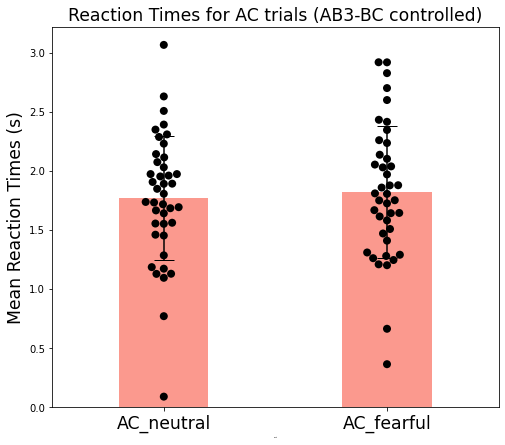

In [8]:
neuAC_mean = np.nanmean(avg_AC_neu)
emoAC_mean = np.nanmean(avg_AC_emo)


neuAC_std = np.nanstd(avg_AC_neu)
emoAC_std = np.nanstd(avg_AC_emo)



# Define labels, positions, bar heights and error bar heights
labels = ['AC_neutral', 'AC_fearful']
x_pos = np.arange(len(labels))
CTEs = [neuAC_mean, emoAC_mean]
error = [neuAC_std, emoAC_std]

# Build the plot
fig, ax = plt.subplots(figsize=(8,7))
sns.swarmplot(data=cntrl_df2, y = 'Total_acc', x = 'condition', color = 'black', size = 8, ax = ax)

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.8,
       width=0.4,
       color='salmon',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Mean Reaction Times (s)', fontsize = 'xx-large')
ax.set_xlabel('Test', fontsize = 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 'xx-large')
ax.set_title('Reaction Times for AC trials (AB3-BC controlled)', fontsize = 'xx-large')

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'

## lined bar/scatter graph

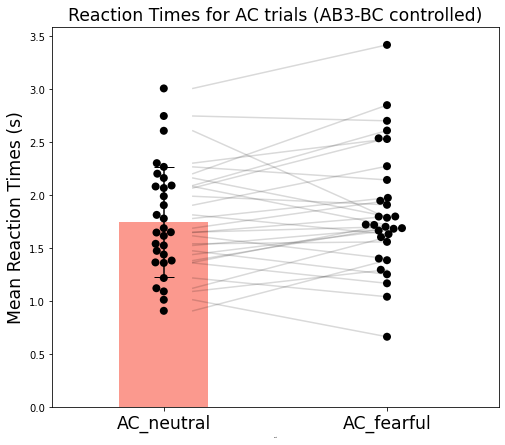

In [15]:
neuAC_mean = np.mean(avg_AC_neu)
emoAC_mean = np.mean(avg_AC_emo)


neuAC_std = np.std(avg_AC_neu)
emoAC_std = np.std(avg_AC_emo)



# Define labels, positions, bar heights and error bar heights
labels = ['AC_neutral', 'AC_fearful']
x_pos = np.arange(len(labels))
CTEs = [neuAC_mean, emoAC_mean]
error = [neuAC_std, emoAC_std]

# Build the plot
fig, ax = plt.subplots(figsize=(8,7))
sns.swarmplot(data=cntrl_df2, y = 'Total_acc', x = 'condition', color = 'black', size = 8, ax = ax)

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.8,
       width=0.4,
       color='salmon',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Mean Reaction Times (s)', fontsize = 'xx-large')
ax.set_xlabel('Test', fontsize = 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 'xx-large')
ax.set_title('Reaction Times for AC trials (AB3-BC controlled)', fontsize = 'xx-large')
###

h = cntrl_df2.query('condition == "Avg AC"')['Total_acc'].values
d = cntrl_df2.query('condition == "Avg AC_emo"')['Total_acc'].values
i = 0.6
# Set up the x-axis values
x1 = i - 0.4
x2 = i + 0.4
 # Set up line color (based on greater than value)
 #line_colors = (h - d) > 0
 #line_colors = [blue if j else red for j in line_colors]
 #line_colors = [red if j else blue for j in line_colors]
 # Also set up alpha values to make the lines slightly transparent
 #alphas = [0.4]*len(line_colors)
 # Plot the lines connecting the dots
 #for hi, di, ci, ai in zip(h, d, line_colors, alphas):
 # ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
line_color = ["black"]
line_colors = np.repeat(line_color, len(h))
alphas = [0.15]*len(line_colors)

 # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'

NameError: name 'melted_df' is not defined

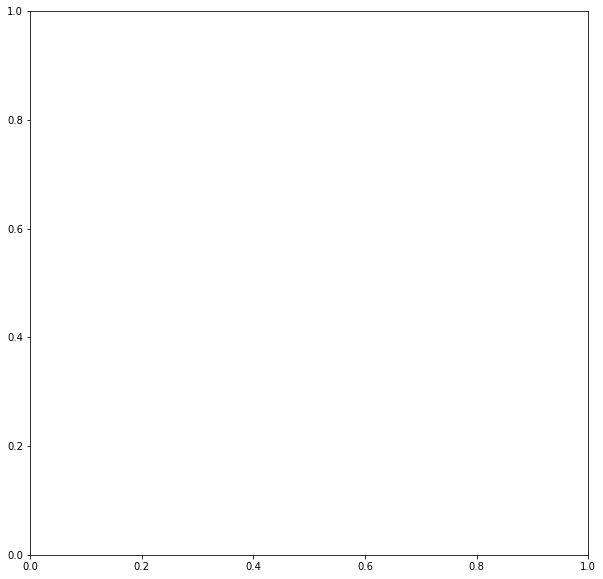

In [9]:
 #red = '#c04e01' #burnt orange
red = '#579d42' #muted green (xkcd)
#blue = '#0165fc' #cobalt blue
blue = '#00a9b7' #iris (xkcd)

fig, ax = plt.subplots(figsize=(10, 10))
####FOR BAR GRAPHS####
#get same-context bias means and sems by valence
same_context = melted_df.loc[melted_df['context'] == 'same']
same_context_neu = same_context.loc[same_context['valence'] == 'control-neutral']
same_context_neu_mean = np.mean(same_context_neu['bias'])
same_context_neu_se = stats.sem(same_context_neu['bias'])
same_context_neg = same_context.loc[same_context['valence'] == 'negative']
same_context_neg_mean = np.mean(same_context_neg['bias'])
same_context_neg_se = stats.sem(same_context_neg['bias'])

#get bound-context bias means and sems by valence
bound_context = melted_df.loc[melted_df['context'] == 'boundary']
bound_context_neu = bound_context.loc[bound_context['valence'] == 'control-neutral']
bound_context_neu_mean = np.mean(bound_context_neu['bias'])
bound_context_neu_se = stats.sem(bound_context_neu['bias'])
bound_context_neg = bound_context.loc[bound_context['valence'] == 'negative']
bound_context_neg_mean = np.mean(bound_context_neg['bias'])
bound_context_neg_se = stats.sem(bound_context_neg['bias'])

same_context_means = [same_context_neu_mean, same_context_neg_mean]
same_context_sems = [same_context_neu_se, same_context_neg_se]
bound_context_means = [bound_context_neu_mean, bound_context_neg_mean]
bound_context_sems = [bound_context_neu_se, bound_context_neg_se]
##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, same_context_means, width,
    color= blue,
    edgecolor= "black",
    yerr=same_context_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
ax.bar(ind+width, bound_context_means, width,
    color= red,
    edgecolor= "black",
    yerr=bound_context_sems,
    error_kw=dict(elinewidth=2.5,ecolor='black'))
##################
#SCATTERPLOT GRAPHS
##################
valences = []
#i = 1.0
i = 0.2
for valence, subdf in melted_df.groupby('valence'):
    valences.append(valence)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('context == "same"')['bias'].values
    d = subdf.query('context == "boundary"')['bias'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
     # Set up line color (based on greater than value)
     #line_colors = (h - d) > 0
     #line_colors = [blue if j else red for j in line_colors]
     #line_colors = [red if j else blue for j in line_colors]
     # Also set up alpha values to make the lines slightly transparent
     #alphas = [0.4]*len(line_colors)
     # Plot the lines connecting the dots
     #for hi, di, ci, ai in zip(h, d, line_colors, alphas):
     # ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(h))
    alphas = [0.15]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1-0.07, x2], [hi, di], c=ci, alpha=ai)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.07], h, c=blue, edgecolors= "black",
    s=25, lw=0.5, label='same', zorder=10)
    ax.scatter(len(d)*[x2+0.01], d, c=red, edgecolors= "black",
    s=25, lw=0.5, label='boundary', zorder=10)
 # Update x-axis
    i += 1
    
# Fix the axes and labels
    
ax.set_xticks([0, 1])
_ = ax.set_xticklabels(valences, fontsize='x-large')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Context Valence', fontsize = 15)
ax.set_ylabel('Close response bias', fontsize =15)